In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# targets
targets = [(-33.15789473684211, 17.5, "Cape Town, South Africa"),
           (-23.684210526315795, 47.5, "Taolagnaro, Madagascar"),
           (-25.578947368421055, 32.5, "Maputo, Mozambique"),
           (-4.736842105263165, 40.0, "Mombasa, Kenya"),
           (12.315789473684205, 37.5, "Gondar, Ethiopia"),
           (23.68421052631578, 57.5, "Muscat, Oman"),
           (27.473684210526315, 57.5, "Bandar Abbas, Iran"),
           (21.78947368421052, 72.5, "Surat, India"),
           (29.368421052631575, 77.5, "Delhi, India"),
           (12.315789473684205, 80.0, "Chennai (Madras), India"),
           (21.78947368421052, 87.5, "Kolkata (Calcutta), India"),
           (18.0, 97.5, "Bago (Pegu), Myanmar"),
           (19.89473684210526, 95.0, "Rakhine (Arakan), Myanmar"),
           (-6.631578947368425, 107.5, "Jakarta (Batavia), Indonesia"),
           (40.73684210526315, 117.5, "Beijing, China"),
           (-8.526315789473685, 115.0, "Mataram City, Indonesia"),
           (-2.8421052631579045, 127.5, "Ambon, Indonesia"),
           (10.421052631578900, 80.0, "Jaffna, Sri Lanka")]

In [3]:
# python gets really weird with numbers with too many decimal points
# it causes problems later on (it was annoying and took some time to fix :(
# so we are going to round everything to 1 decimal point, which does not affect accuracy
# since in phyda, every latitude used is around 2 degrees from the next one

In [3]:
target_coords = dict()
for target in targets:
    target_coords[(round(target[0], 1), round(target[1], 1))] = target[2]

In [4]:
print(target_coords)
print(len(target_coords))

{(-33.2, 17.5): 'Cape Town, South Africa', (-23.7, 47.5): 'Taolagnaro, Madagascar', (-25.6, 32.5): 'Maputo, Mozambique', (-4.7, 40.0): 'Mombasa, Kenya', (12.3, 37.5): 'Gondar, Ethiopia', (23.7, 57.5): 'Muscat, Oman', (27.5, 57.5): 'Bandar Abbas, Iran', (21.8, 72.5): 'Surat, India', (29.4, 77.5): 'Delhi, India', (12.3, 80.0): 'Chennai (Madras), India', (21.8, 87.5): 'Kolkata (Calcutta), India', (18.0, 97.5): 'Bago (Pegu), Myanmar', (19.9, 95.0): 'Rakhine (Arakan), Myanmar', (-6.6, 107.5): 'Jakarta (Batavia), Indonesia', (40.7, 117.5): 'Beijing, China', (-8.5, 115.0): 'Mataram City, Indonesia', (-2.8, 127.5): 'Ambon, Indonesia', (10.4, 80.0): 'Jaffna, Sri Lanka'}
18


In [5]:
# open the two csv files compiled previously
df_jja = pd.read_csv("jun_to_aug.csv")
df_djf = pd.read_csv("dec_to_feb.csv")

In [6]:
columns = ["Date", "Location", "PDSI", "SPEI", "group"]
df_target = pd.DataFrame(columns=columns) # the dataframe we'll be working with to graph; contains all data
df_target_jja = pd.DataFrame(columns=columns) # this dataframe only has data from the jja csv file
df_target_djf = pd.DataFrame(columns=columns) # this dataframe only has data from the djf csv file

In [8]:
# below, we verify that each target location has 61 records in the csv files

In [15]:
for target_coord in list(target_coords.keys()):
    count = 0
    # collect the rows of the targets from df_jja
    for index, row in df_jja.iterrows():
        coord = (round(float(row["Latitude"]),1), round(float(row["Longitude"]),1))
        if coord == target_coord:
            count += 1
    print(target_coord, count)

(-33.2, 17.5) 61
(-23.7, 47.5) 61
(-25.6, 32.5) 61
(-4.7, 40.0) 61
(12.3, 37.5) 61
(23.7, 57.5) 61
(27.5, 57.5) 61
(21.8, 72.5) 61
(29.4, 77.5) 61
(12.3, 80.0) 61
(21.8, 87.5) 61
(18.0, 97.5) 61
(19.9, 95.0) 61
(-6.6, 107.5) 61
(40.7, 117.5) 61
(-8.5, 115.0) 61
(-2.8, 127.5) 61
(10.4, 80.0) 61


In [16]:
for target_coord in list(target_coords.keys()):
    count = 0
    # collect the rows of the targets from df_djf
    for index, row in df_djf.iterrows():
        coord = (round(float(row["Latitude"]),1), round(float(row["Longitude"]),1))
        if coord == target_coord:
            count += 1
    print(target_coord, count)

(-33.2, 17.5) 61
(-23.7, 47.5) 61
(-25.6, 32.5) 61
(-4.7, 40.0) 61
(12.3, 37.5) 61
(23.7, 57.5) 61
(27.5, 57.5) 61
(21.8, 72.5) 61
(29.4, 77.5) 61
(12.3, 80.0) 61
(21.8, 87.5) 61
(18.0, 97.5) 61
(19.9, 95.0) 61
(-6.6, 107.5) 61
(40.7, 117.5) 61
(-8.5, 115.0) 61
(-2.8, 127.5) 61
(10.4, 80.0) 61


# Grouping

In [7]:
# 17 countries are too crowded on the graph, so we split them into three groups

# I am commenting out these so i can graph for the focus groups
"""
# Africa
group1 = ["Cape Town, South Africa", "Taolagnaro, Madagascar", "Maputo, Mozambique", "Mombasa, Kenya", 
          "Gondar, Ethiopia"]

# South Asia and the Middle East
group2 = ["Muscat, Oman", "Bandar Abbas, Iran", "Surat, India", "Delhi, India", "Chennai, India", "Kolkata, India"]

# Southeast and East Asia
group3 = ["Bago, Myanmar", "Rakhine, Myanmar", "Jakarta, Indonesia", "Beijing, China", "Mataram City, Indonesia", \
         "Ambon, Indonesia"]
"""

# temp code so i can graph the focus groups
group1 = []
group2 = []
group3 = []

# spei_jja_focus_group
group4 = ["Surat, India", "Cape Town, South Africa", "Ambon, Indonesia", "Beijing, China", \
                       "Bandar Abbas, Iran", "Kolkata (Calcutta), India", "Delhi, India"]

# spei_djf_focus_group
group5 = ["Jakarta (Batavia), Indonesia", "Rakhine (Arakan), Myanmar", "Bago (Pegu), Myanmar", \
                       "Chennai (Madras), India", "Jaffna, Sri Lanka"]

In [8]:
# collect data from the jun-aug dataset
target_coords_keys = list(target_coords.keys())
for index, row in df_jja.iterrows():
    coord = (round(float(row["Latitude"]),1), round(float(row["Longitude"]),1))
    if coord in target_coords_keys:
        date = float(row["Date"][:4])
        location = target_coords[coord]
        if location in group1:
            group = 1
        elif location in group2:
            group = 2
        elif location in group3:
            group = 3
        elif location in group4:
            group = 4
        elif location in group5: 
            group = 5
        else:
            group = 0
        pdsi = round(float(row["pdsi_mn"]), 4)
        spei = round(float(row["spei_mn"]), 4)
        
        new_row = {'Date': date, 'Location': location, "PDSI": pdsi, "SPEI": spei, "group": group}
        df_target = df_target.append(new_row, ignore_index=True)     
        df_target_jja = df_target_jja.append(new_row, ignore_index=True)

In [9]:
# collect data from the dec-feb dataset
target_coords_keys = list(target_coords.keys())
for index, row in df_djf.iterrows():
    coord = (round(float(row["Latitude"]),1), round(float(row["Longitude"]),1))
    if coord in target_coords_keys:
        date = float(row["Date"][:4]) + 0.5
        location = target_coords[coord]
        if location in group1:
            group = 1
        elif location in group2:
            group = 2
        elif location in group3:
            group = 3
        elif location in group4:
            group = 4
        elif location in group5: 
            group = 5
        else:
            group = 0
        pdsi = round(float(row["pdsi_mn"]), 4)
        spei = round(float(row["spei_mn"]), 4)
        
        new_row = {'Date': date, 'Location': location, "PDSI": pdsi, "SPEI": spei, "group": group}
        df_target = df_target.append(new_row, ignore_index=True)
        df_target_djf = df_target_djf.append(new_row, ignore_index=True)

In [10]:
# sort the data in the new dataframes by location and date
df_target.sort_values(by=['Location', 'Date'], inplace=True)
df_target_jja.sort_values(by=['Location', 'Date'], inplace=True)
df_target_djf.sort_values(by=['Location', 'Date'], inplace=True)

In [23]:
# start plotting

# set some colors

# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#524f4f", # location1      (gray)
    "#11A579", # location2      (sage green)
    "#3969AC", # location3      (pastel blue)
    "#F2B701", # location4      (mustard yellow)
    "#E73F74", # location5      (bold pink)
    "#E68310", # location6      (orange) 
    "#8601af"  # location7      (dark blue)
]

# Vertical lines every 10 years
VLINES = np.arange(1630, 1690, 10)

# PDSI and SPEI raw data graphs

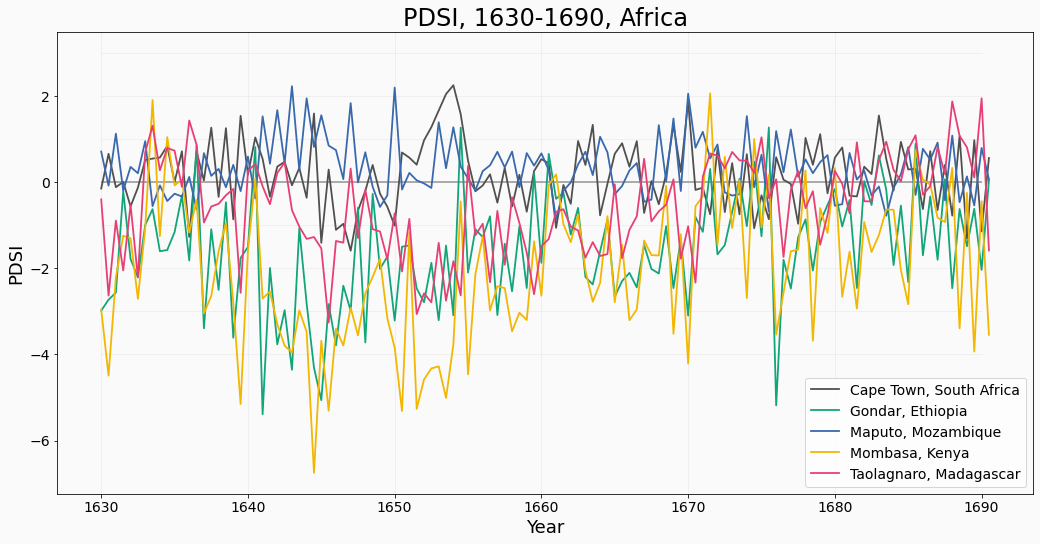

In [205]:
# PDSI graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_target[df_target["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

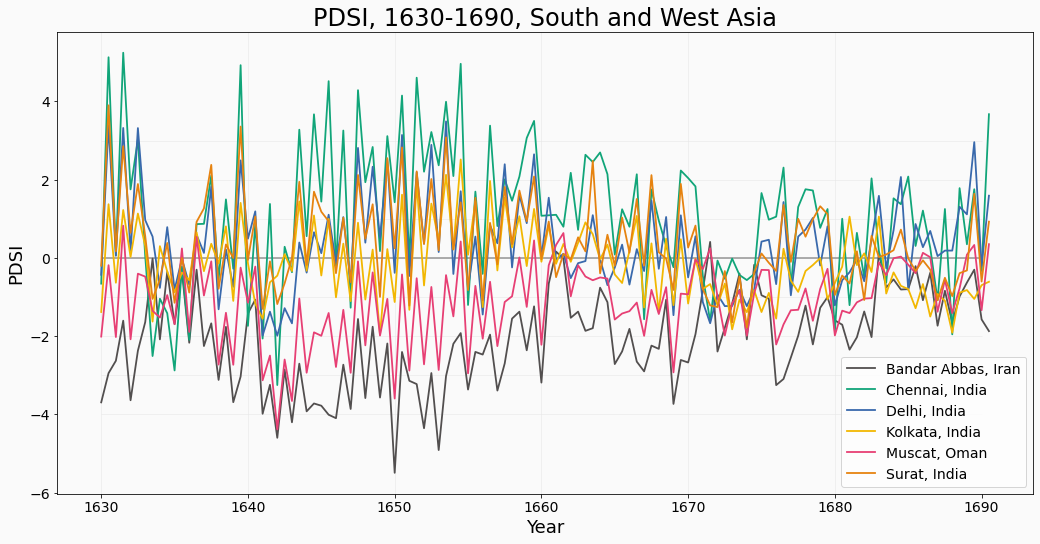

In [206]:
# PDSI graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group2
df_group2 = df_target[df_target["group"] == 2]

for idx, group in enumerate(df_group2["Location"].unique()):
    data = df_group2[df_group2["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

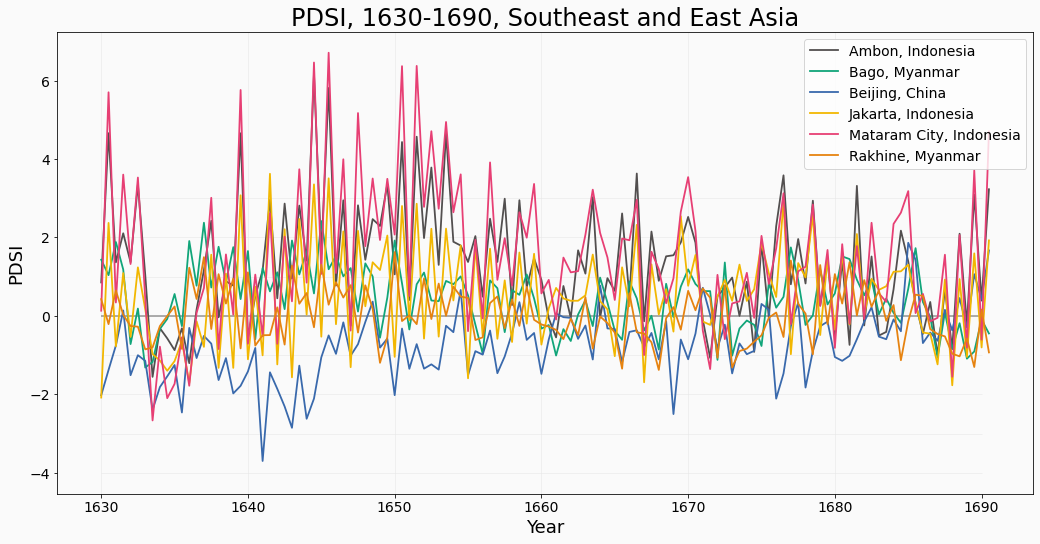

In [207]:
# PDSI graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group3 = df_target[df_target["group"] == 3]

for idx, group in enumerate(df_group3["Location"].unique()):
    data = df_group3[df_group3["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

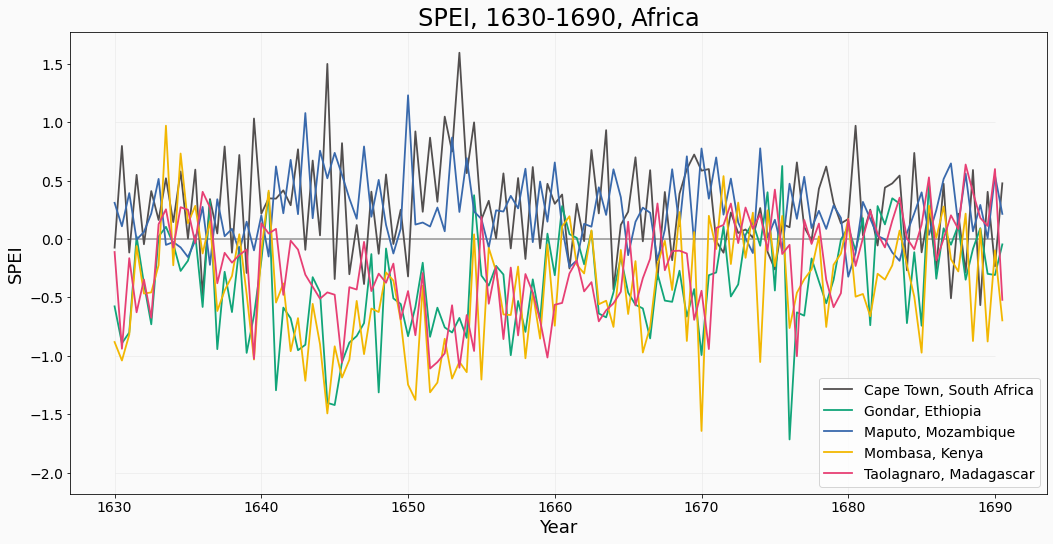

In [208]:
# SPEI graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-2, 2), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_target[df_target["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

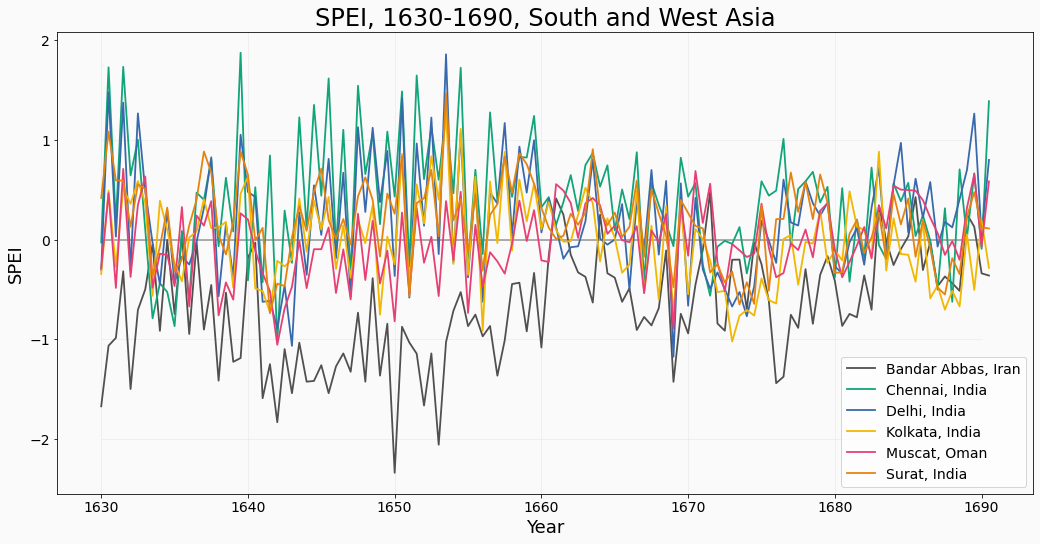

In [209]:
# SPEI graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-2, 2), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group2
df_group2 = df_target[df_target["group"] == 2]

for idx, group in enumerate(df_group2["Location"].unique()):
    data = df_group2[df_group2["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

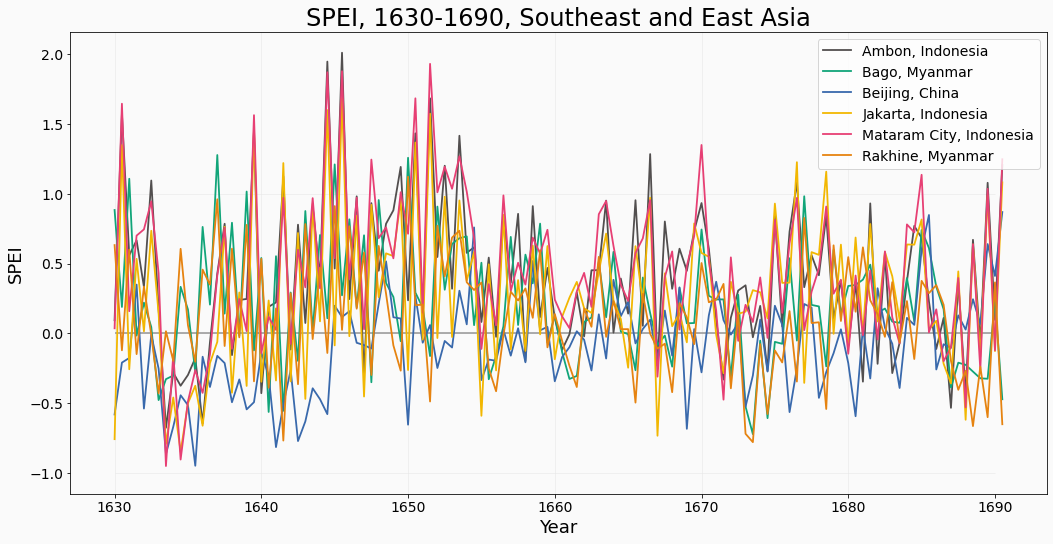

In [210]:
# SPEI graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1, 2), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group3 = df_target[df_target["group"] == 3]

for idx, group in enumerate(df_group3["Location"].unique()):
    data = df_group3[df_group3["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

# Year-on-year and season-on-season difference graphs

In [13]:
# add a dummy row on the previous dataframes for easier processing later
new_row = {'Date': 0, 'Location': 'dummy', "PDSI": 0, "SPEI": 0, "group": 0}
df_target = df_target.append(new_row, ignore_index=True)
df_target_jja = df_target_jja.append(new_row, ignore_index=True)
df_target_djf = df_target_djf.append(new_row, ignore_index=True)

In [14]:
df_target.tail(10)

Date                Location    PDSI    SPEI group
2187  1686.5  Taolagnaro, Madagascar -0.0980  0.0010     0
2188  1687.0  Taolagnaro, Madagascar  0.8056  0.2027     0
2189  1687.5  Taolagnaro, Madagascar  0.1882  0.0852     0
2190  1688.0  Taolagnaro, Madagascar  1.8704  0.6370     0
2191  1688.5  Taolagnaro, Madagascar  1.0711  0.3973     0
2192  1689.0  Taolagnaro, Madagascar  0.8054  0.1800     0
2193  1689.5  Taolagnaro, Madagascar  0.1044  0.1119     0
2194  1690.0  Taolagnaro, Madagascar  1.9425  0.5985     0
2195  1690.5  Taolagnaro, Madagascar -1.5887 -0.5205     0
2196     0.0                   dummy  0.0000  0.0000     0

In [15]:
columns = ["Date", "Location", "PDSI_diff", "SPEI_diff", "group"]
df_diff_jja = pd.DataFrame(columns=columns) # dataframe to store year-on-year difference in jun-aug 
df_diff_djf = pd.DataFrame(columns=columns) # dataframe to store year-on-year difference in dec-feb 
df_diff_sn = pd.DataFrame(columns=columns) # dataframe to store season-on-season difference 

In [16]:
# collect data for the df_diff_jja dataframe

end_index = df_target_jja.shape[0]

for i in range(0, end_index-1): 
    cur_row = df_target_jja.iloc[i]
    next_row = df_target_jja.iloc[i+1]
    
    cur_location = cur_row["Location"]
    next_location = next_row["Location"]
    
    if cur_location == next_location:
        date = next_row["Date"]
        psdi_diff = round(next_row["PDSI"] - cur_row["PDSI"], 4)
        spei_diff = round(next_row["SPEI"] - cur_row["SPEI"], 4)
        group = cur_row["group"]
        
        new_row = {'Date': date, 'Location': cur_location, "PDSI_diff": psdi_diff, "SPEI_diff": spei_diff, \
                   "group": group}

        df_diff_jja = df_diff_jja.append(new_row, ignore_index=True)

In [17]:
# collect data for the df_diff_djf dataframe

end_index = df_target_djf.shape[0]

for i in range(0, end_index-1): 
    cur_row = df_target_djf.iloc[i]
    next_row = df_target_djf.iloc[i+1]
    
    cur_location = cur_row["Location"]
    next_location = next_row["Location"]
    
    if cur_location == next_location:
        date = next_row["Date"] - 0.5
        psdi_diff = round(next_row["PDSI"] - cur_row["PDSI"], 4)
        spei_diff = round(next_row["SPEI"] - cur_row["SPEI"], 4)
        group = cur_row["group"]
        
        new_row = {'Date': date, 'Location': cur_location, "PDSI_diff": psdi_diff, "SPEI_diff": spei_diff, \
                   "group": group}

        df_diff_djf = df_diff_djf.append(new_row, ignore_index=True)

In [18]:
# collect data for the df_diff_sn dataframe

end_index = df_target.shape[0]

for i in range(0, end_index-1): 
    cur_row = df_target.iloc[i]
    next_row = df_target.iloc[i+1]
    
    cur_location = cur_row["Location"]
    next_location = next_row["Location"]
    
    if cur_location == next_location:
        date = next_row["Date"]
        psdi_diff = round(next_row["PDSI"] - cur_row["PDSI"], 4)
        spei_diff = round(next_row["SPEI"] - cur_row["SPEI"], 4)
        group = cur_row["group"]
        
        new_row = {'Date': date, 'Location': cur_location, "PDSI_diff": psdi_diff, "SPEI_diff": spei_diff, \
                   "group": group}

        df_diff_sn = df_diff_sn.append(new_row, ignore_index=True)

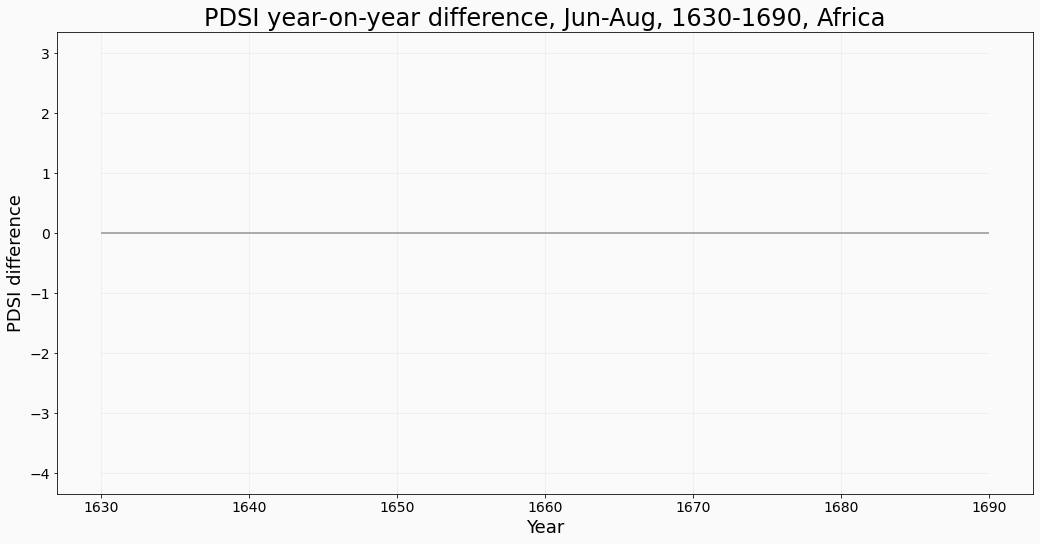

In [20]:
# PDSI jja diff graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Jun-Aug, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

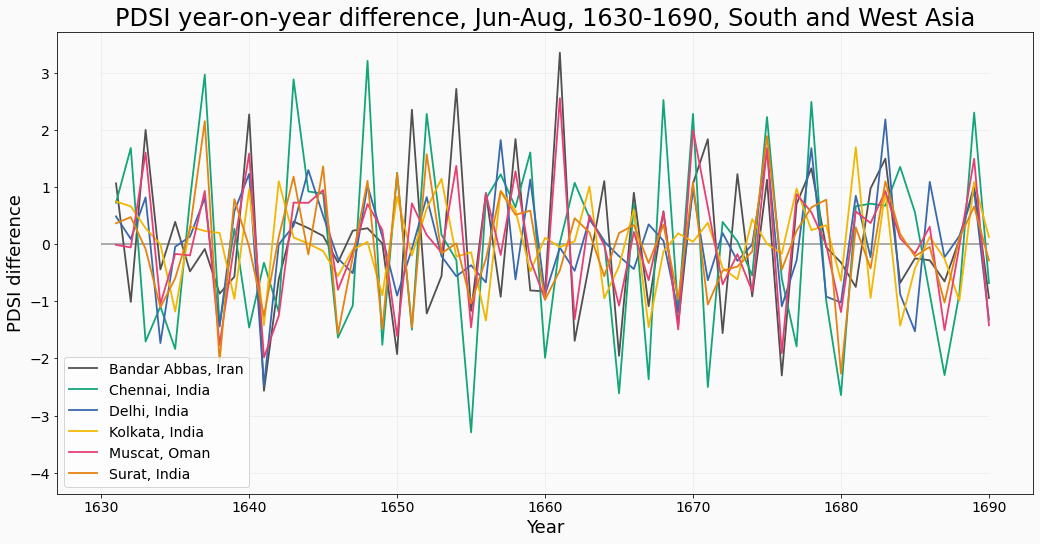

In [85]:
# PDSI jja diff graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Jun-Aug, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

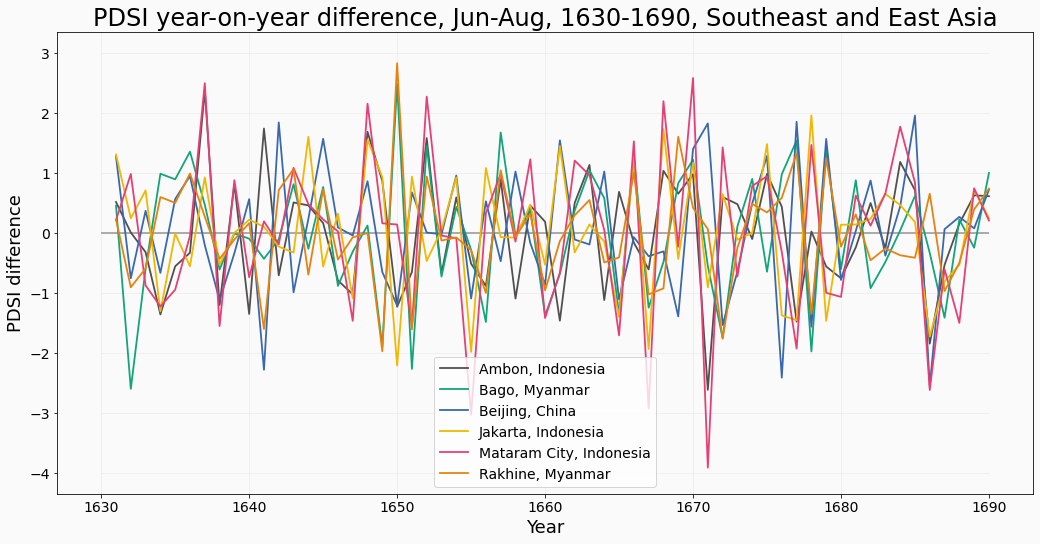

In [86]:
# PDSI jja diff graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Jun-Aug, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

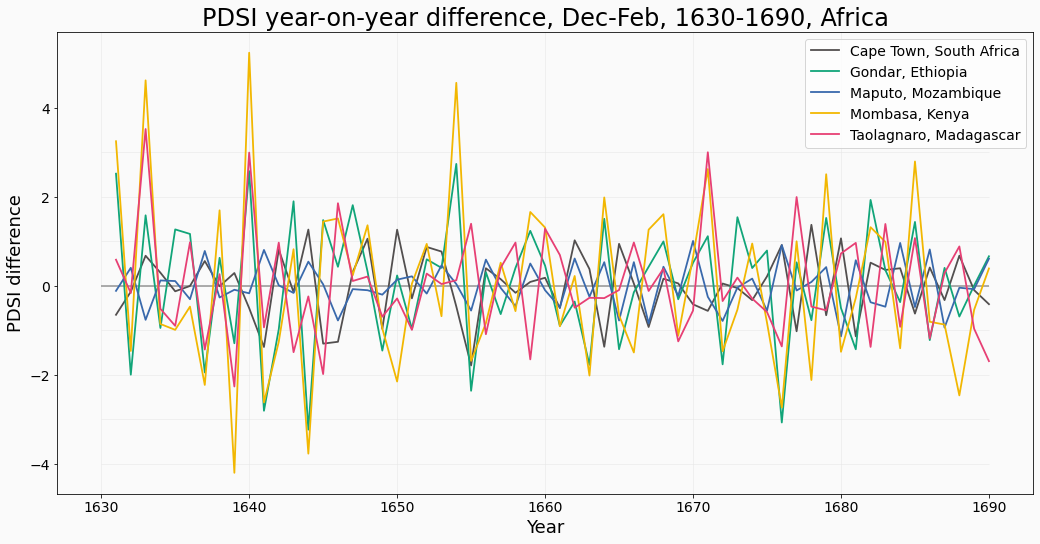

In [87]:
# PDSI djf diff graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Dec-Feb, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

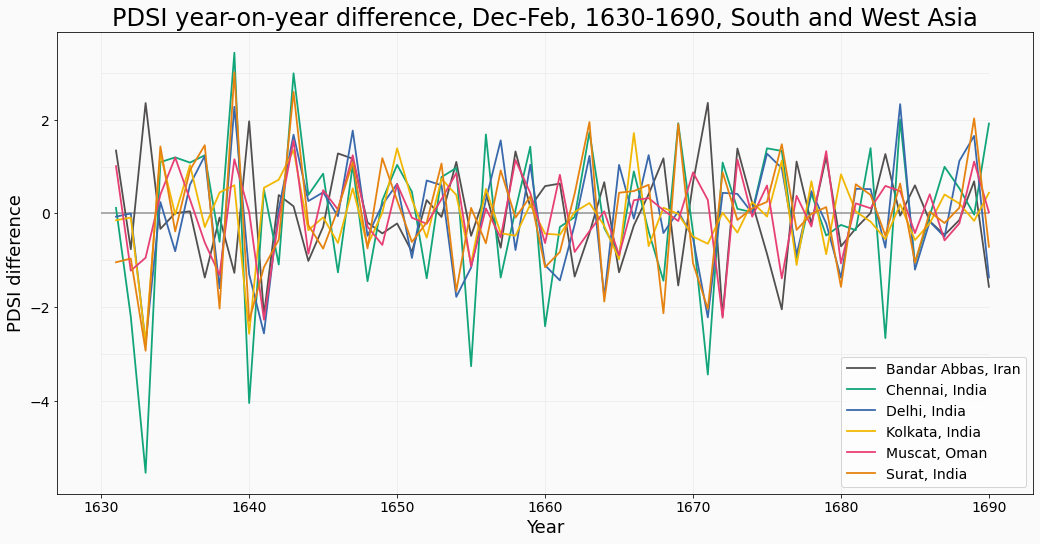

In [88]:
# PDSI djf diff graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Dec-Feb, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

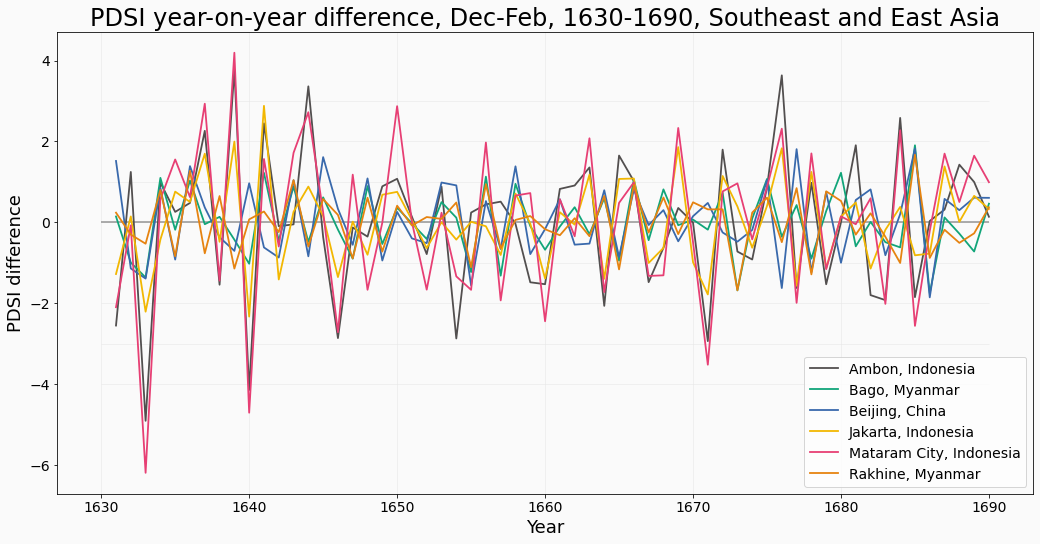

In [89]:
# PDSI djf diff graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI year-on-year difference, Dec-Feb, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

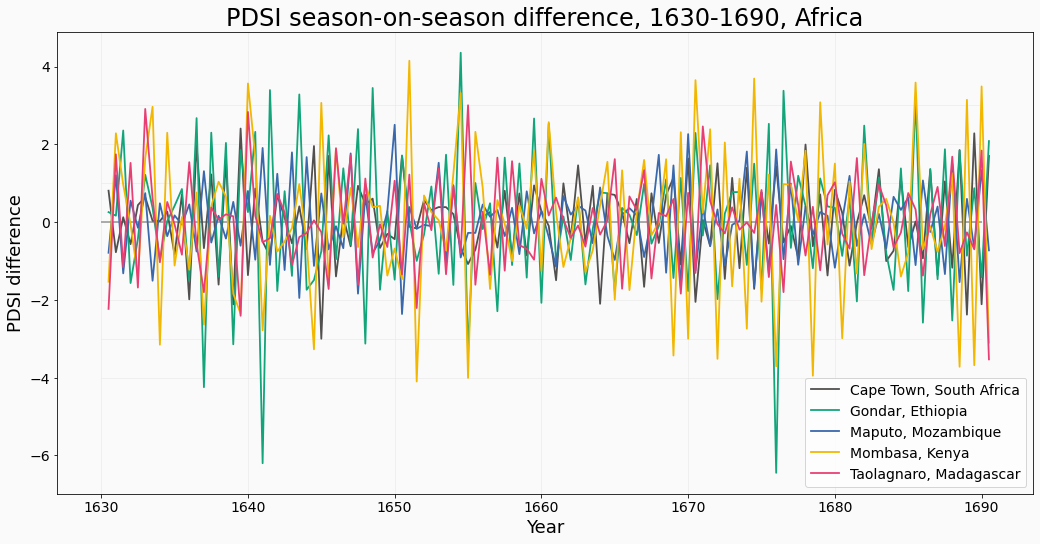

In [90]:
# PDSI season graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI season-on-season difference, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

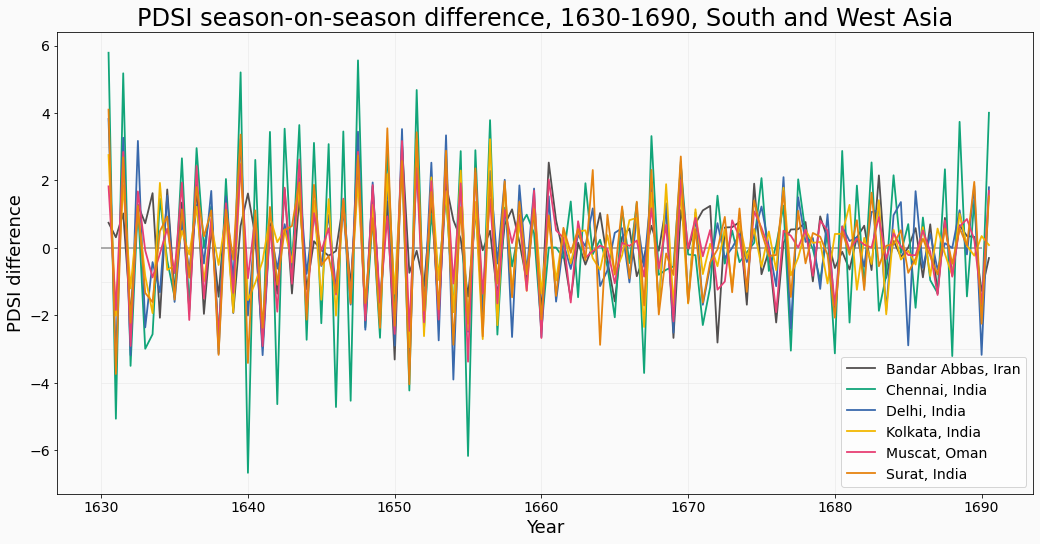

In [91]:
# PDSI season graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI season-on-season difference, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

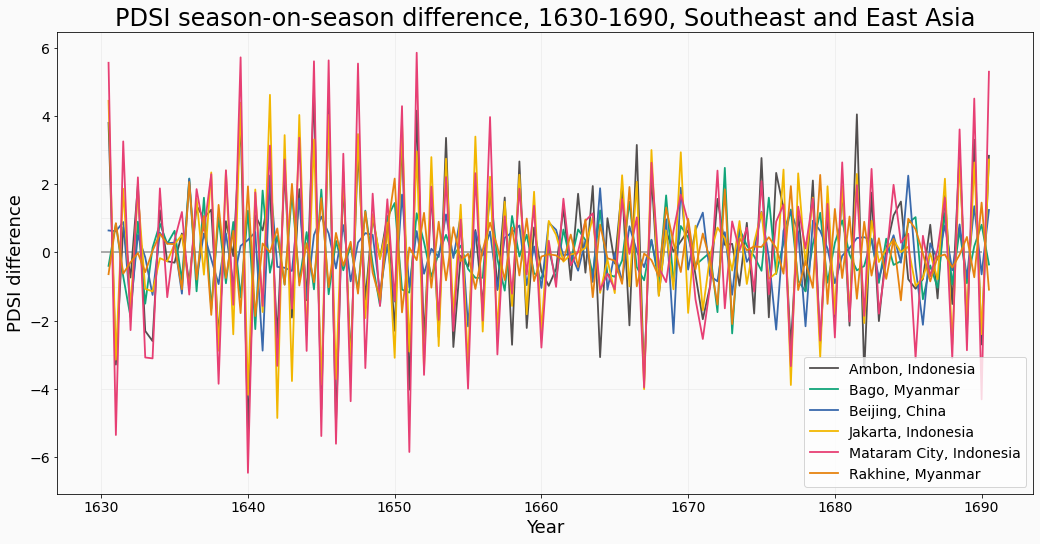

In [92]:
# PDSI season graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-4, 4), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('PDSI season-on-season difference, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('PDSI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "PDSI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

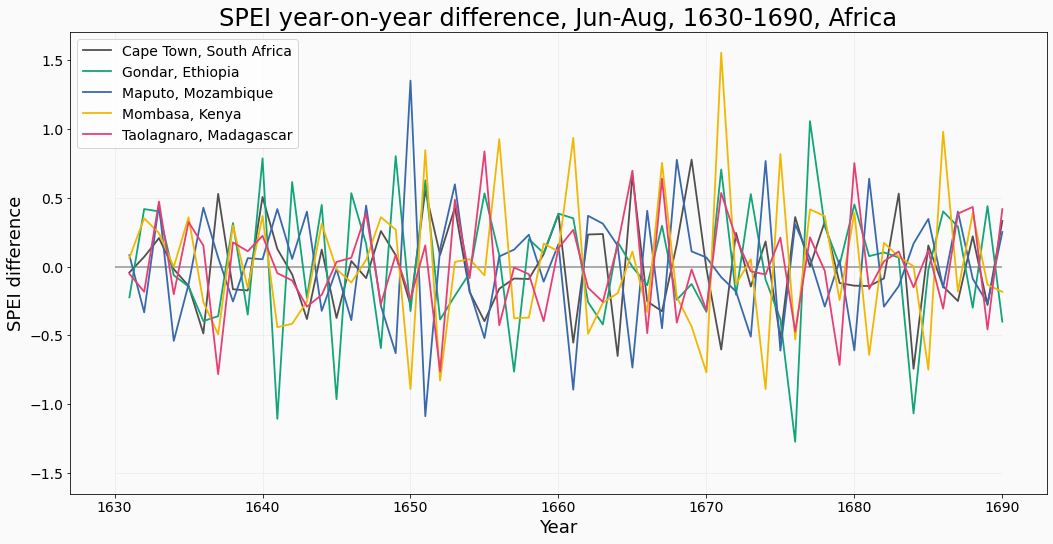

In [36]:
# SPEI jja diff graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Jun-Aug, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

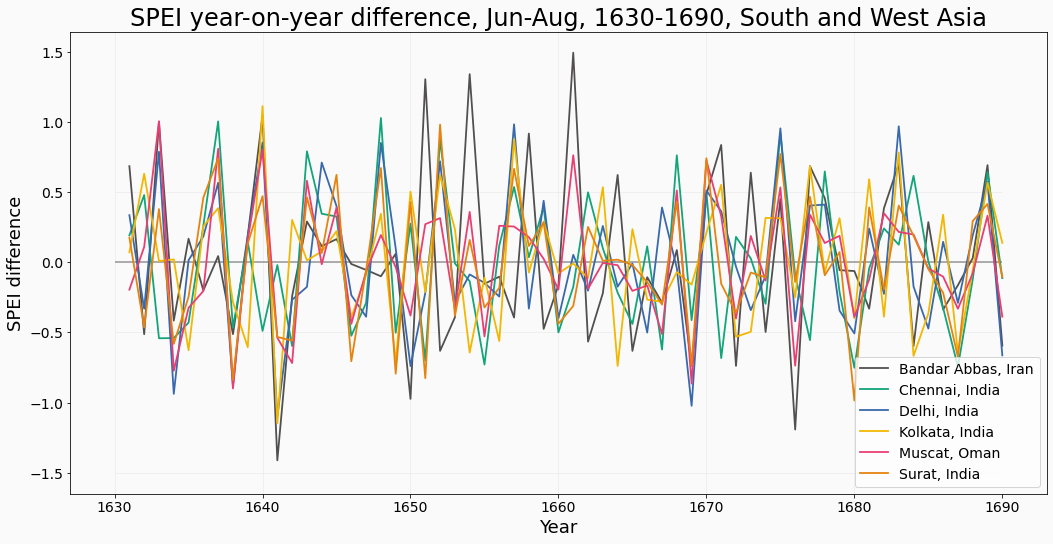

In [94]:
# SPEI jja diff graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Jun-Aug, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

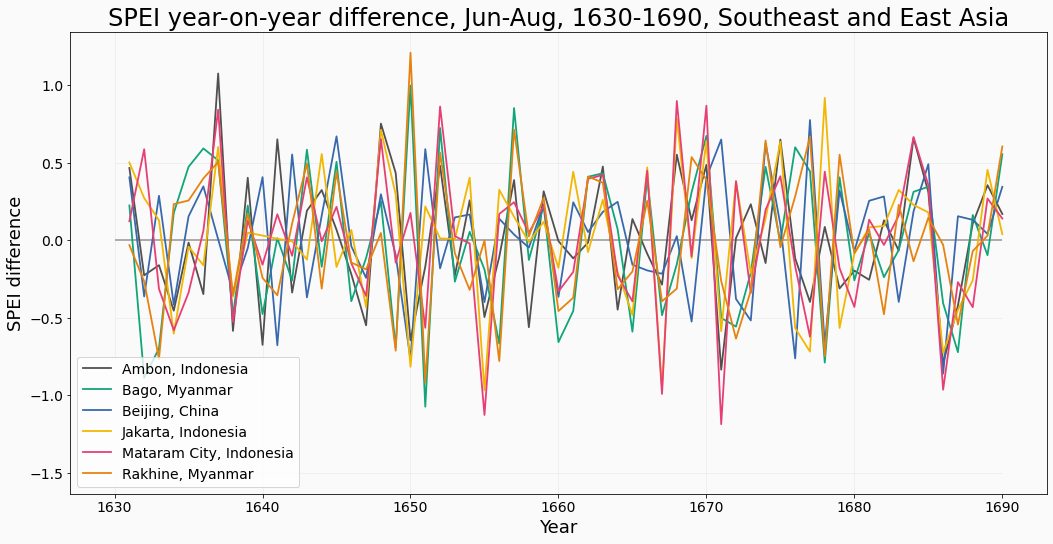

In [95]:
# SPEI jja diff graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Jun-Aug, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_jja[df_diff_jja["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

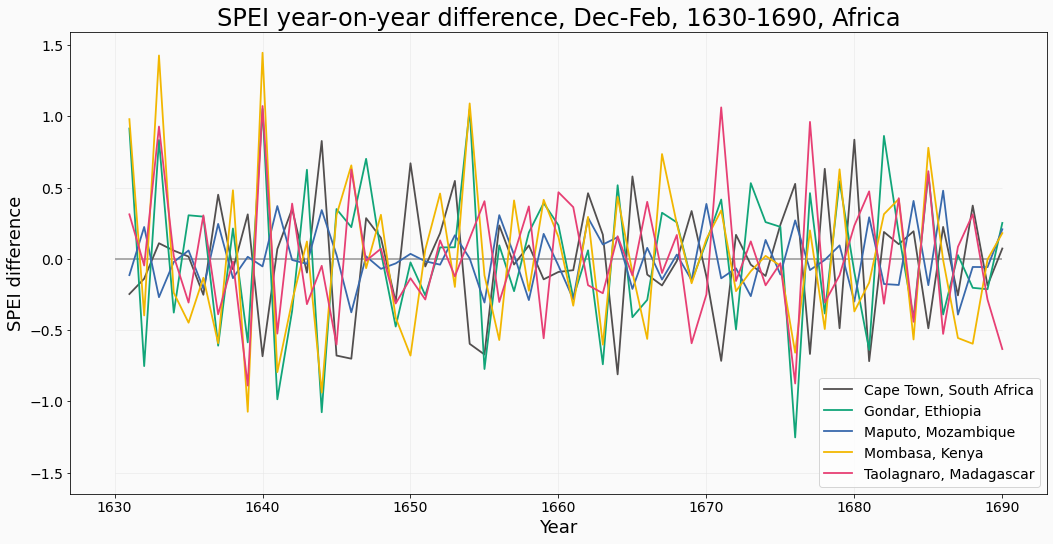

In [96]:
# SPEI djf diff graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Dec-Feb, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

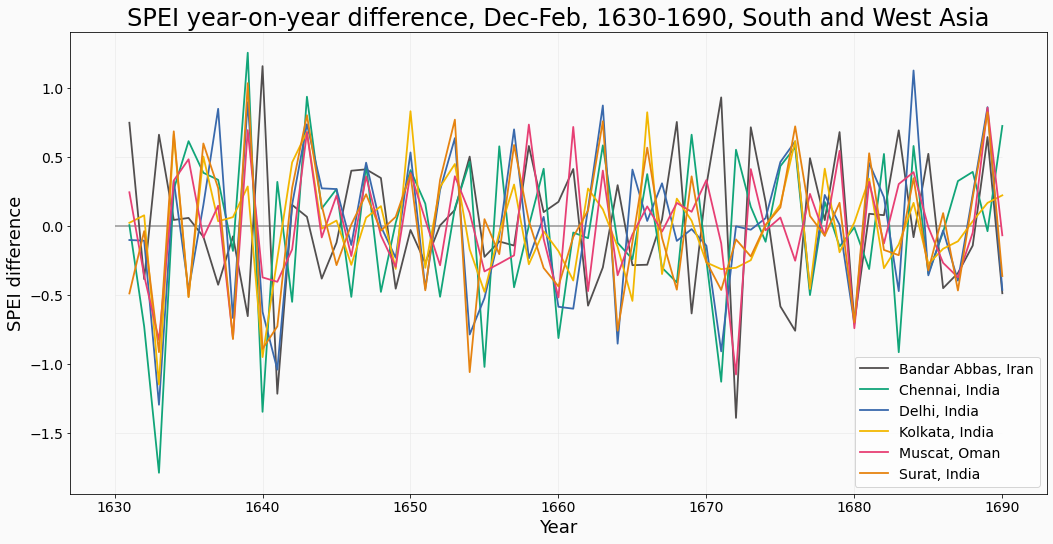

In [97]:
# SPEI djf diff graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Dec-Feb, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

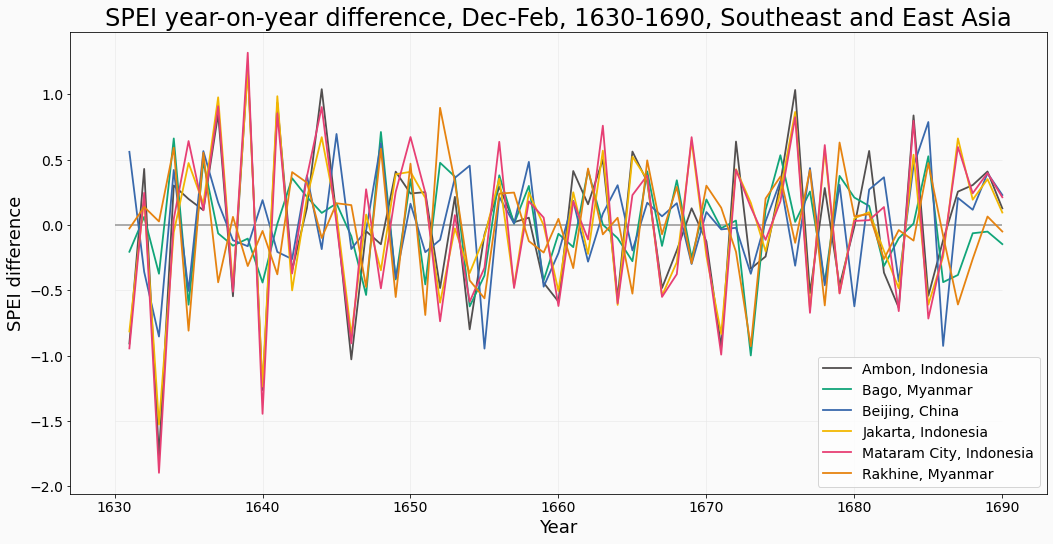

In [98]:
# SPEI djf diff graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Dec-Feb, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_djf[df_diff_djf["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

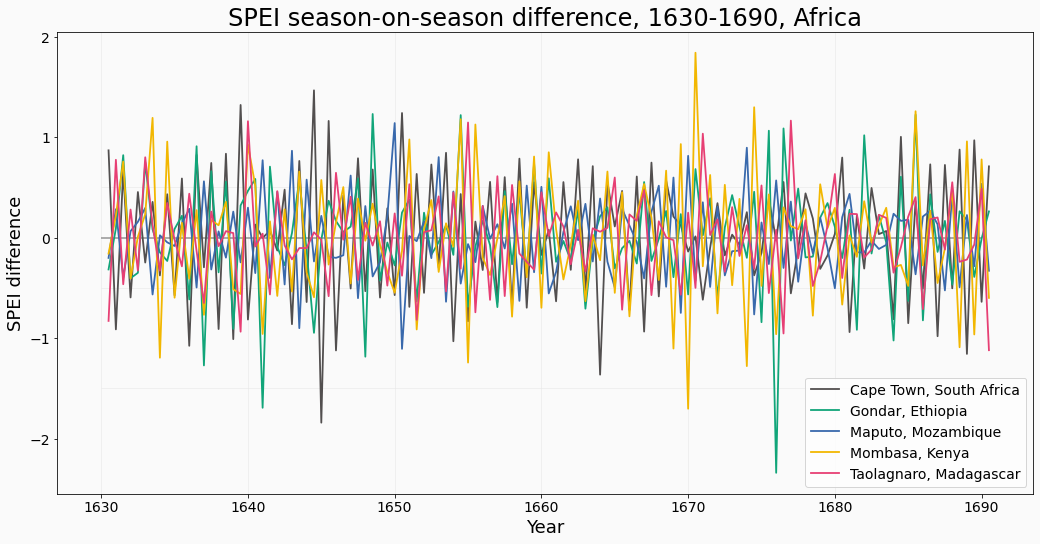

In [99]:
# SPEI season graph for group 1

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI season-on-season difference, 1630-1690, Africa', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 1]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

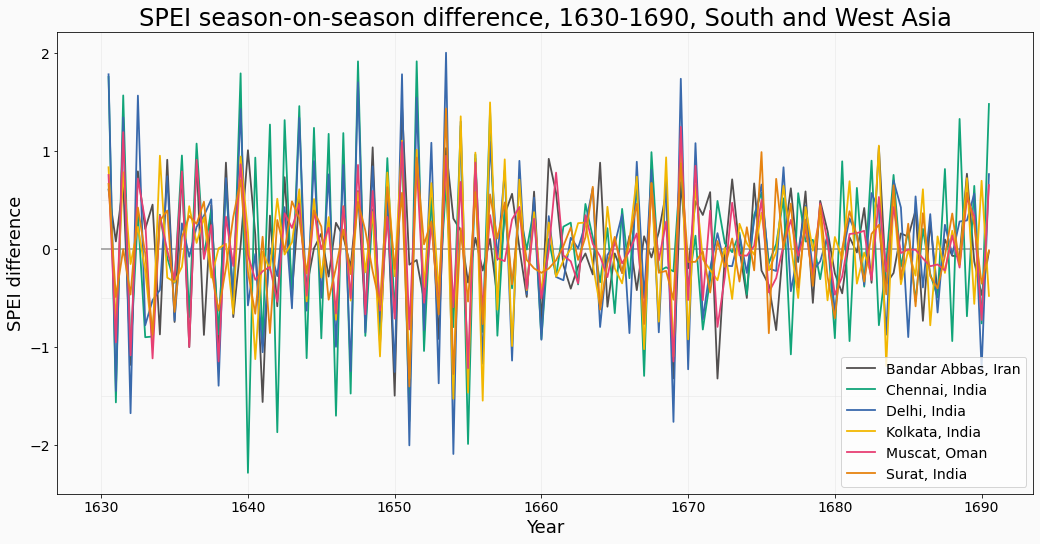

In [100]:
# SPEI season graph for group 2

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI season-on-season difference, 1630-1690, South and West Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 2]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

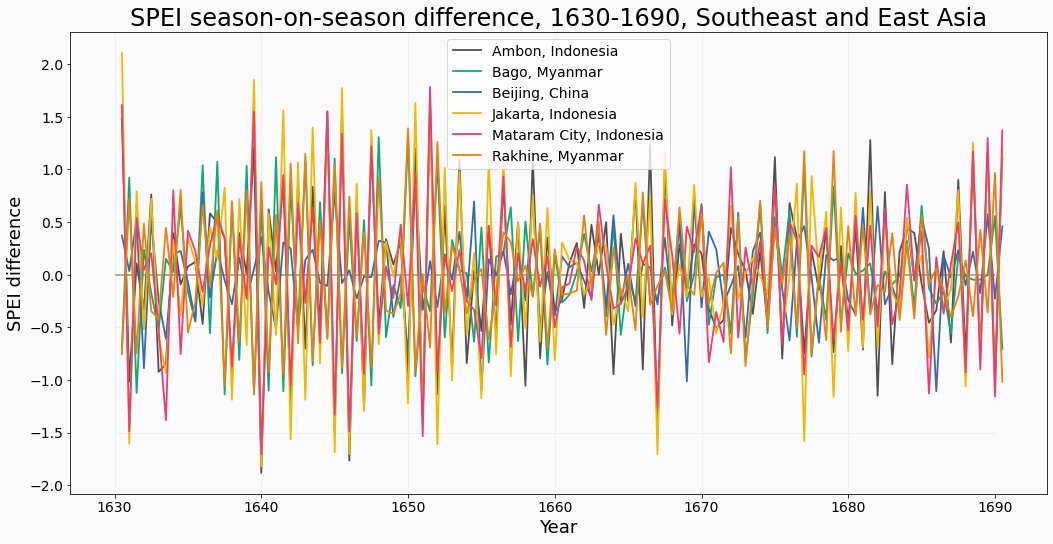

In [101]:
# SPEI season graph for group 3

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI season-on-season difference, 1630-1690, Southeast and East Asia', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group1 = df_diff_sn[df_diff_sn["group"] == 3]

for idx, group in enumerate(df_group1["Location"].unique()):
    data = df_group1[df_group1["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

# SPEI graphs for specific groups

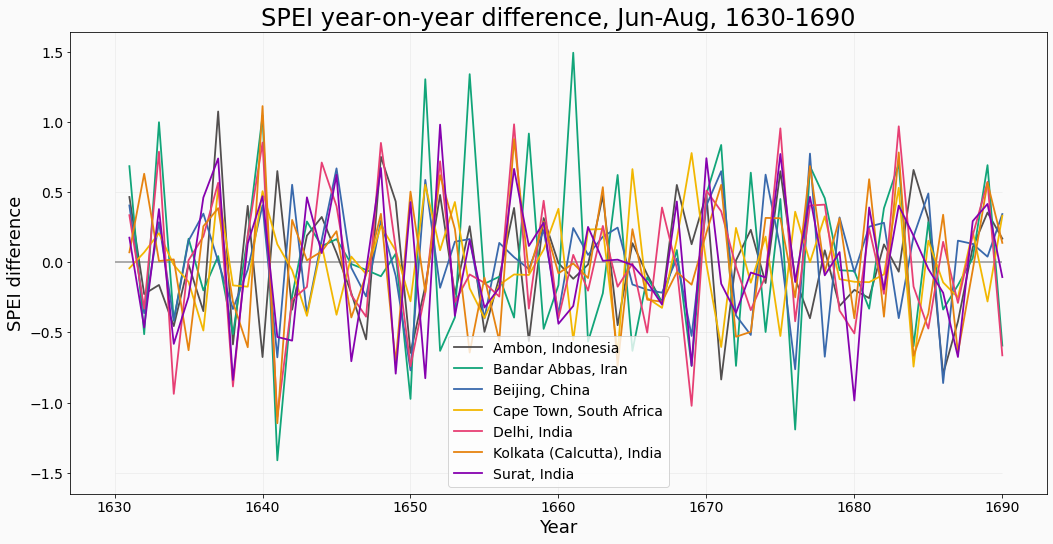

In [24]:
# An SPEI graph of JJA year-on-year for the focus group 4

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Jun-Aug, 1630-1690', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group4
df_group4 = df_diff_jja[df_diff_jja["group"] == 4]

for idx, group in enumerate(df_group4["Location"].unique()):
    data = df_group4[df_group4["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')

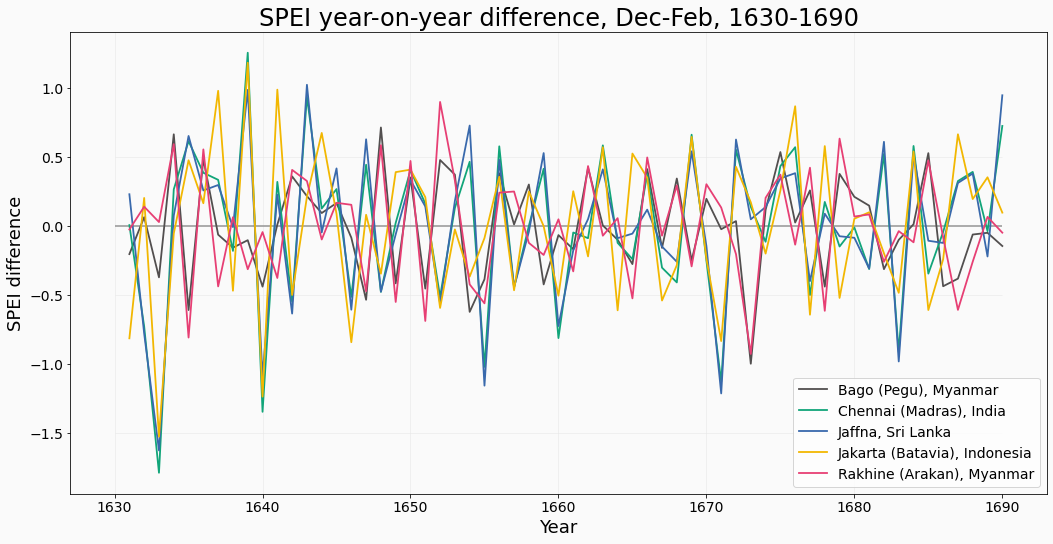

In [20]:
# An SPEI graph of DJF year-on-year for the focus group 5

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(-1.5, 1.5), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('SPEI year-on-year difference, Dec-Feb, 1630-1690', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('SPEI difference', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------
# Create one data frame for group1
df_group5 = df_diff_djf[df_diff_djf["group"] == 5]

for idx, group in enumerate(df_group5["Location"].unique()):
    data = df_group5[df_group5["Location"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "SPEI_diff", color=color, lw=1.8, data=data, label=group)
    ax.legend(fontsize='14')